<a href="https://colab.research.google.com/github/ashishkumarsaklani/Jam-project/blob/main/Jamboree_Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures

In [ ]:
url ='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv'
df = pd.read_csv(url)
def get_data(df):
    url ='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv'

    df = pd.read_csv(url)
    df = df.drop('Serial No.', axis=1)
    #checking data
    df.head().style.set_properties(**{'background':'black','border': '1.5px solid blue','color': 'red'})
    #print(df.head())
    #df = df.rename(columns={'GRE Score ': 'LOR ', 'LOR':'AAAA'})
    return df
df = get_data(df)
print(df.head())

   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65  


In [ ]:
df.iloc[:,:2]

,GRE Score,TOEFL Score
0,337,118
1,324,107
2,316,104
3,322,110
4,314,103
...,...,...
495,332,108
496,337,117
497,330,120
498,312,103


#Select Features to Drop for testing

In [ ]:
df = df.drop('GRE Score', axis=1 )

In [ ]:
df = df.drop('TOEFL Score', axis=1 )

In [ ]:
df = df.drop('University Rating', axis=1)

In [ ]:
df = df.drop('SOP', axis=1 )

In [ ]:
df = df.drop('LOR ', axis=1 )

In [ ]:
df = df.drop('Research', axis=1 )

In [ ]:
df = df.drop('CGPA', axis=1 )

#Setting X and y

In [ ]:
#setting X and y
def set_xy(df):
    X = df.drop('Chance of Admit ', axis=1)
    y = df['Chance of Admit ']
    return X,y,df
X,y,df = set_xy(df)

In [ ]:
#checking data
df.head().style.set_properties(**{'background':'black','border': '1.5px solid blue','color': 'red'})

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.500000,4.500000,9.650000,1,0.920000
1,324,107,4,4.000000,4.500000,8.870000,1,0.760000
2,316,104,3,3.000000,3.500000,8.000000,1,0.720000
3,322,110,3,3.500000,2.500000,8.670000,1,0.800000
4,314,103,2,2.000000,3.000000,8.210000,0,0.650000


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
# Checking for Multicollinearity
#correlation_matrix = df.drop('Chance of Admit ', axis=1).corr()
#print(correlation_matrix)

# Calculating VIF
#X_with_intercept = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

            Variable          VIF
0          GRE Score  1308.061089
1        TOEFL Score  1215.951898
2  University Rating    20.933361
3                SOP    35.265006
4               LOR     30.911476
5               CGPA   950.817985
6           Research     2.869493


In [ ]:
#spliting train and test
def split_train_test(df):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = split_train_test(df)

In [ ]:
X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,334,116,4,4.0,3.5,9.54,1
73,314,108,4,4.5,4.0,9.04,1
374,315,105,2,2.0,2.5,7.65,0
155,312,109,3,3.0,3.0,8.69,0
104,326,112,3,3.5,3.0,9.05,1


In [ ]:
print(X_train.shape)
print(y_train.shape)

(400, 7)
(400,)


In [ ]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

# Scatter plot for Ý Chance of Admit

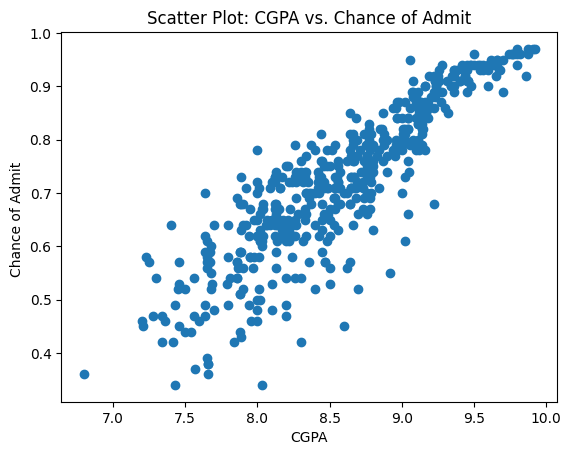

In [ ]:

plt.scatter(df['CGPA'], df['Chance of Admit '])
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit ')
plt.title('Scatter Plot: CGPA vs. Chance of Admit')
plt.show()


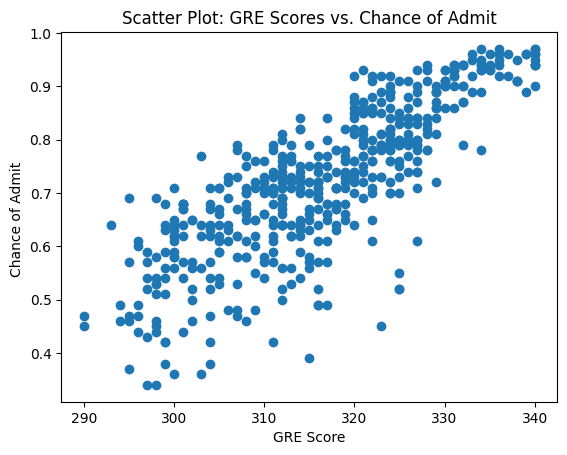

In [ ]:

plt.scatter(df['GRE Score'], df['Chance of Admit '])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit ')
plt.title('Scatter Plot: GRE Scores vs. Chance of Admit')
plt.show()

# Repeat for other predictor variables

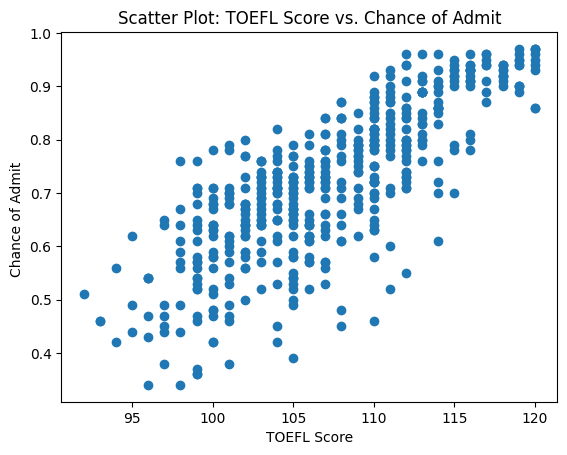

In [ ]:

plt.scatter(df['TOEFL Score'], df['Chance of Admit '])
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit ')
plt.title('Scatter Plot: TOEFL Score vs. Chance of Admit')
plt.show()

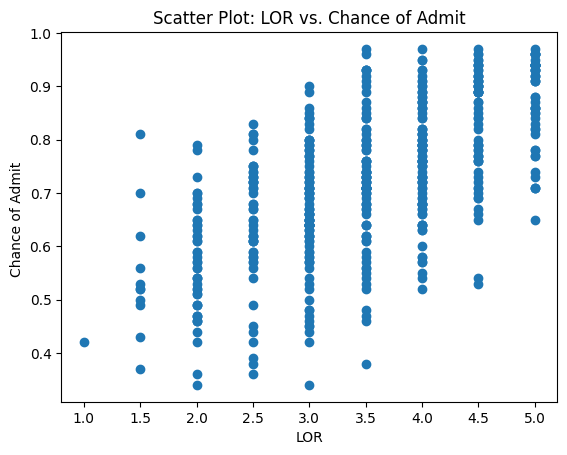

In [ ]:

plt.scatter(df['LOR '], df['Chance of Admit '])
plt.xlabel('LOR')
plt.ylabel('Chance of Admit ')
plt.title('Scatter Plot: LOR vs. Chance of Admit')
plt.show()

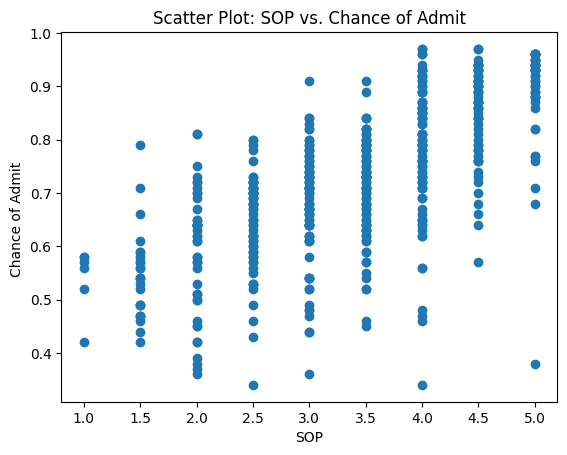

In [ ]:

plt.scatter(df['SOP'], df['Chance of Admit '])
plt.xlabel('SOP')
plt.ylabel('Chance of Admit ')
plt.title('Scatter Plot: SOP vs. Chance of Admit')
plt.show()

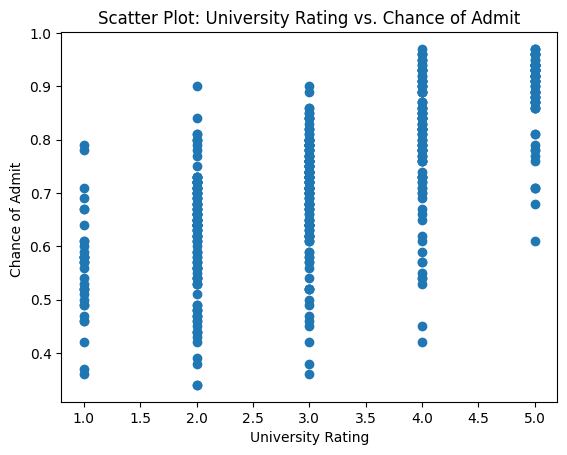

In [ ]:

plt.scatter(df['University Rating'], df['Chance of Admit '])
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit ')
plt.title('Scatter Plot: University Rating vs. Chance of Admit')
plt.show()

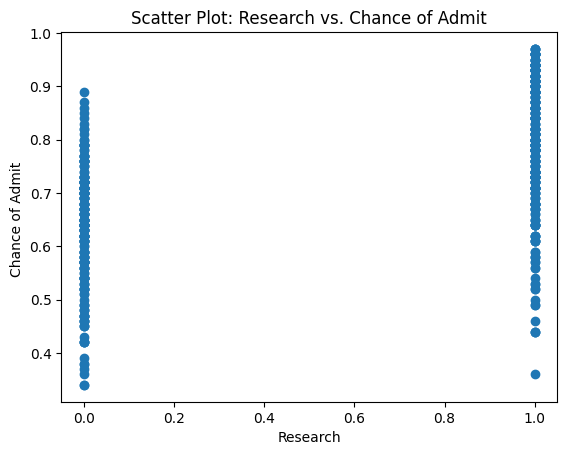

In [ ]:

plt.scatter(df['Research'], df['Chance of Admit '])
plt.xlabel('Research')
plt.ylabel('Chance of Admit ')
plt.title('Scatter Plot: Research vs. Chance of Admit')
plt.show()

#Linear Regression model

In [69]:
 def lin_model(X_train, X_test, y_train, y_test):
    # Initialize the model
    model = LinearRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    print(f'Mean Squared Error: {mse}')
    print(f'R-squared Value: {r2}')
lin_model(X_train, X_test, y_train, y_test)

Mean Squared Error: 0.003704655398788405
R-squared Value: 0.8188432567829631


#Linear model with Min Max Scaling

In [ ]:
def sca_lin_model():
    # Min-Max scaling
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Linear Regression Model
    model_scaled = LinearRegression()
    model_scaled.fit(X_train_scaled, y_train)

    # Model Evaluation
    y_pred_scaled = model_scaled.predict(X_test_scaled)
    mse_scaled = mean_squared_error(y_test, y_pred_scaled)
    r2_scaled = r2_score(y_test, y_pred_scaled)

    print(f'Mean Squared scaled Error: {mse_scaled}')
    print(f'R-squared scaled Value: {r2_scaled}')

sca_lin_model()

Mean Squared scaled Error: 0.003704655398788409
R-squared scaled Value: 0.8188432567829629


#Polynomial model

In [ ]:
def poly_model():
    # Create polynomial feature transformer
    poly = PolynomialFeatures(degree=1, include_bias=False)  # Create quadratic features

    # Fit the polynomial features to the training data
    X_train_poly = poly.fit_transform(X_train)



    # Fit the model to the training data
    model.fit(X_train_poly, y_train)

    # Transform the testing data using the fitted transformer
    X_test_poly = poly.transform(X_test)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_poly)

    # Print the first 10 predicted values and their corresponding true values
    #print("Predicted values:", y_pred[:10])
    #print("True values:", y_test[:10])

    # Evaluate the model's performance using mean squared error (MSE)
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean squared error:", mse)
    print("R squared Value:", r2)
    #coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
    #print(coefficients)
poly_model()

Mean squared error: 0.0037046553987884023
R squared Value: 0.8188432567829632


#LASSO MODEL

In [ ]:
def lasso_model():
    # Initialize the model
    model = linear_model.Lasso(alpha=0.001)
    model_scaled = LinearRegression()


    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)


    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    print(f'Mean Squared Error: {mse}')
    print(f'R-squared Value: {r2}')
    #coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
    #print(coefficients)


lasso_model()


Mean Squared Error: 0.0038073077894457898
R-squared Value: 0.813823579978201


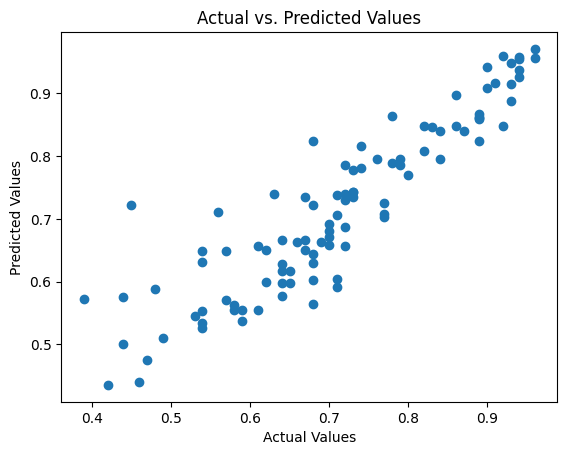

In [ ]:
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()


#SGD Model

In [ ]:
def sgd_model():
    from sklearn.linear_model import SGDRegressor
    import numpy as np

    # Initialize the SGDRegressor with 'loss' set to 'squared_loss' for linear regression
    sgd_model = SGDRegressor(loss='squared_error', random_state=42)

    # Training parameters
    epochs = 1000
    learning_rate = 0.01

    # Lists to store iteration and loss values
    iterations = []
    losses = []

    # Manual training loop
    for epoch in range(epochs):
        sgd_model.partial_fit(X_train_scaled, y_train)

        # Calculate loss at each iteration
        y_pred = sgd_model.predict(X_train_scaled)
        mse = mean_squared_error(y_train, y_pred)

        # Append iteration and loss values to lists
        iterations.append(epoch)
        losses.append(mse)



    y_pred = sgd_model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)

    print("Mean squared error:", mse)
    print("R squared Value:", r2)

sgd_model()

Mean squared error: 0.0035469853259583496
R squared Value: 0.8134726882526115


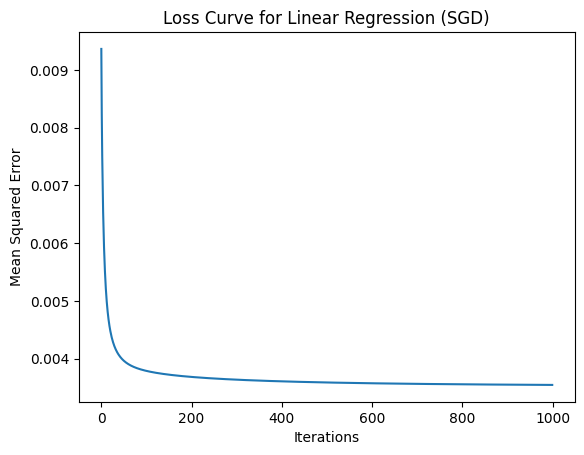

In [ ]:
# Plot the loss curve
plt.plot(iterations, losses)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curve for Linear Regression (SGD)')
plt.show()

In [ ]:
y_head,x_head = y_test[:10],X_test[:10]
y_head.values


array([0.93, 0.84, 0.39, 0.77, 0.74, 0.89, 0.47, 0.57, 0.68, 0.82])

In [ ]:
y_pred_head = model.predict(x_head)
np.round(y_pred_head,2)

array([0.91, 0.79, 0.58, 0.71, 0.81, 0.86, 0.47, 0.65, 0.82, 0.81])

In [ ]:
y_pred_scaled_head = model_scaled.predict(x_head)
np.round(y_pred_head,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([0.91, 0.79, 0.58, 0.71, 0.81, 0.86, 0.47, 0.65, 0.82, 0.81])

# Recursive Model testing

In [70]:
df = get_data(df)

X,y,df= set_xy(df)

# Get the column names
columns = X.columns
df_t = X

# Print columns progressively and then in reverse order
total_columns = len(columns)
for i in range(1, total_columns * 2):
    if i <= total_columns:
        df_t = X.iloc[:, :i]

    else:
        df_t = X.iloc[:, - (total_columns * 2 - i):]


    print(df_t.columns.values)
    #df = df[df_t.columns.values]
    X_train, X_test, y_train, y_test =split_train_test(df_t)

    lin_model(X_train, X_test, y_train, y_test)

['GRE Score']
Mean Squared Error: 0.003704655398788405
R-squared Value: 0.8188432567829631
['GRE Score' 'TOEFL Score']
Mean Squared Error: 0.003704655398788405
R-squared Value: 0.8188432567829631
['GRE Score' 'TOEFL Score' 'University Rating']
Mean Squared Error: 0.003704655398788405
R-squared Value: 0.8188432567829631
['GRE Score' 'TOEFL Score' 'University Rating' 'SOP']
Mean Squared Error: 0.003704655398788405
R-squared Value: 0.8188432567829631
['GRE Score' 'TOEFL Score' 'University Rating' 'SOP' 'LOR ']
Mean Squared Error: 0.003704655398788405
R-squared Value: 0.8188432567829631
['GRE Score' 'TOEFL Score' 'University Rating' 'SOP' 'LOR ' 'CGPA']
Mean Squared Error: 0.003704655398788405
R-squared Value: 0.8188432567829631
['GRE Score' 'TOEFL Score' 'University Rating' 'SOP' 'LOR ' 'CGPA'
 'Research']
Mean Squared Error: 0.003704655398788405
R-squared Value: 0.8188432567829631
['TOEFL Score' 'University Rating' 'SOP' 'LOR ' 'CGPA' 'Research']
Mean Squared Error: 0.003704655398788405
